PURPOSE: Illustrate the concept of bias and variance for quadratic estimators. Case of polarization intensity.

Notation: variables with index 0 correspond to true values (P0).

@author: jalberto

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# WK estimator
def p_wk(P, sigma):
    arg = P**2 - sigma**2
    Pwk = np.zeros(len(P))
    cut = arg>0
    Pwk[cut] = np.sqrt(arg[cut])
    #Pwk = np.where(arg>0, np.sqrt(arg), 0)
    return Pwk

# MAS estimator
def p_mas(P, sigma):
    sigchi = sigma/(2*P) 
    Pmas   = P * ( 1 - 2*sigchi**2 * (1-np.exp(-P**2/sigma**2)))
    return Pmas

FIRST Example: simulating a measurement in which the intrisic polarization is zero.

In [7]:
nsim = 50000
    
# CASE 1. Intrinsic polarization is zero Q0=U0=0
Q0    = 0.0
U0    = 0.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.

# Simulating Measurements
n = nsim # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma

# Measured value of P (classical method, biased):
P = np.sqrt(Q**2 + U**2)
errP = sigma

# Compute some statistics:
print("CASE 1. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK  = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))
print("----------")

CASE 1. Intrinsic P0 =  0.0
> Mean value of Q =  0.012043676861058889
> Standard deviation of Q   =  0.9984379711584463
> Mean value of U =  -0.009036792059617346
> Standard deviation of U   =  0.9984533218930253
> Mean value of P =  1.2508843081333234
> Standard deviation of P   =  0.6552118586221489
Biased-corrected estimators:
> Mean value of PWK =  0.7572001126292687
> Mean value of Pmas=  0.9862596656379528
----------


The resulting P is biased. The two considered estimators partially correct for that bias.
The posterior (distribution of P values) is given by a Rice function:

(array([7.250e+02, 2.032e+03, 3.255e+03, 4.302e+03, 4.736e+03, 5.038e+03,
        5.168e+03, 4.813e+03, 4.268e+03, 3.669e+03, 3.095e+03, 2.473e+03,
        1.950e+03, 1.394e+03, 1.069e+03, 6.840e+02, 4.930e+02, 3.240e+02,
        2.080e+02, 1.290e+02, 7.900e+01, 4.200e+01, 2.000e+01, 1.600e+01,
        1.000e+01, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([4.02047658e-03, 1.72533188e-01, 3.41045900e-01, 5.09558611e-01,
        6.78071323e-01, 8.46584035e-01, 1.01509675e+00, 1.18360946e+00,
        1.35212217e+00, 1.52063488e+00, 1.68914759e+00, 1.85766030e+00,
        2.02617302e+00, 2.19468573e+00, 2.36319844e+00, 2.53171115e+00,
        2.70022386e+00, 2.86873657e+00, 3.03724929e+00, 3.20576200e+00,
        3.37427471e+00, 3.54278742e+00, 3.71130013e+00, 3.87981284e+00,
        4.04832556e+00, 4.21683827e+00, 4.38535098e+00, 4.55386369e+00,
        4.72237640e+00, 4.89088911e+00, 5.05940183e+00]),
 <BarContainer object of 30 artists>)

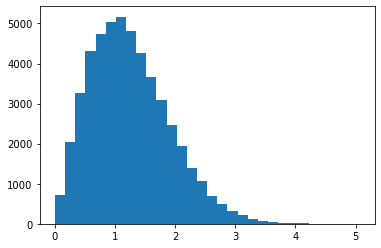

In [6]:
plt.hist(P,bins=30)

SECOND Example: simulating a measurement in which the intrisic polarization non zero, but small compared to the typical error.

In [ ]:
Q0    = 1.0
U0    = 0.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.
    
# simulating Measurements
n     = nsim  # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma

# Measured value of P (clasical method):
P = np.sqrt(Q**2 + U**2)
errP = sigma

# Compute some statistics:
print("CASE 2. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))
PWK = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))
print("----------")